In [22]:
# PCA Attempt:

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Load the extracted nod spectra

In [58]:

detector_1 = ["/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:08:29.976_3.nod.ms.norm.fits",
"/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:12:08.127_3.nod.ms.norm.fits",
"/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:15:38.035_3.nod.ms.norm.fits",
"/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:19:19.884_3.nod.ms.norm.fits",
"/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:22:48.876_3.nod.ms.norm.fits",
"/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:26:28.142_3.nod.ms.norm.fits",
"/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:29:57.131_3.nod.ms.norm.fits",
"/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:33:37.047_3.nod.ms.norm.fits"]
        
        

In [59]:
spectra = [fits.getdata(file)[0].flatten() for file in detector_1]
spectra[0].shape


(1024,)

In [60]:
spectra[0].T

array([0.99745643, 0.9916262 , 0.9990734 , ..., 1.0332797 , 1.0291803 ,
       1.0346082 ], dtype=float32)

In [95]:
x = np.stack(spectra, 1)

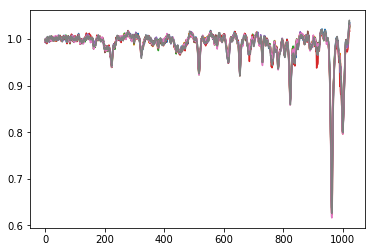

In [97]:
plt.plot(x)
plt.show()

In [42]:
x


array([[ 5940.7686,  6186.5503,  6449.7754, ..., 15100.196 , 14944.217 ,
        15320.755 ],
       [ 5444.209 ,  5961.606 ,  6273.352 , ..., 15174.133 , 15339.029 ,
        15632.447 ],
       [ 5623.7847,  6054.433 ,  6398.1714, ..., 15811.554 , 15708.654 ,
        15916.836 ],
       ...,
       [ 5112.426 ,  5512.0366,  5908.0967, ..., 14298.422 , 14236.327 ,
        14482.285 ],
       [ 4434.8716,  4890.8643,  5245.285 , ..., 12805.289 , 12872.121 ,
        13000.195 ],
       [ 5075.3145,  5424.184 ,  5567.905 , ..., 13027.892 , 13039.326 ,
        13110.232 ]], dtype=float32)

In [43]:
from sklearn.decomposition import PCA

In [69]:
PCA.fit_transform(x)

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [79]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)

#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])

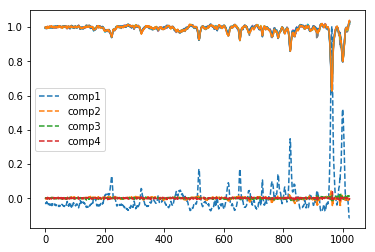

In [82]:
plt.plot(principalComponents, "--")
plt.plot(x)

plt.legend(["comp1", "comp2", "comp3", "comp4",])

In [103]:
# Using pizkorz 



xbar = np.mean(x, axis=1)

xbar

array([0.9962717, 0.9969301, 0.9981766, ..., 1.0266364, 1.0275986,
       1.027618 ], dtype=float32)

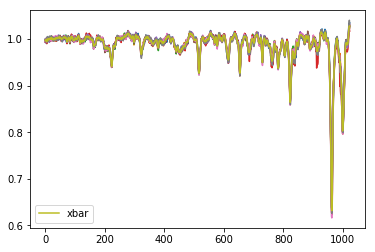

In [104]:

plt.plot(x)
plt.plot(xbar, label="xbar")
plt.legend()

In [107]:
std = np.std(x, axis=1)
std.shape

(1024,)

In [125]:
# Residual matrix
rij = (x - xbar[:,np.newaxis]) / std[:,np.newaxis]
rij.shape

(1024, 8)

In [147]:
C.T-C

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [144]:
# Covariance matrix 
C = np.cov(rij, rowvar=True)
#C = rij.T*rij / (rij.shape[0]-1)
C
C.shape

(1024, 1024)

In [129]:
# Single value decompostion

U, S, VT = np.linalg.svd(C)

In [143]:
print(U.shape)
print(S.shape)
print(VT.shape)


(1024, 1024)
(1024,)
(1024, 1024)


In [131]:
S

array([3.68061620e+02, 1.84851387e+02, 1.55324900e+02, ...,
       1.30556909e-14, 9.94415810e-15, 4.27341195e-15])

In [132]:
VT

array([[-0.00669168, -0.03487896, -0.02651758, ...,  0.0021749 ,
         0.01140775, -0.00295675],
       [ 0.05701736, -0.0127848 ,  0.04359366, ...,  0.07254319,
         0.06918844,  0.06393211],
       [ 0.01546581, -0.02128209,  0.01653172, ...,  0.02301029,
        -0.01511012,  0.03335066],
       ...,
       [ 0.        ,  0.01664898,  0.02186534, ...,  0.01261222,
         0.01413272,  0.00656756],
       [ 0.3528573 , -0.0306179 , -0.03298417, ..., -0.05111071,
         0.03861803, -0.01490063],
       [ 0.        ,  0.01675953,  0.02357842, ...,  0.01754013,
         0.00595625,  0.01614005]])

In [134]:
np.allclose(C, U*S*VT)

False

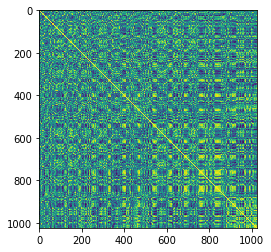

In [137]:
np.set_printoptions(threshold=np.inf)
plt.imshow(C)

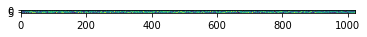

In [139]:
plt.imshow(rij.T)

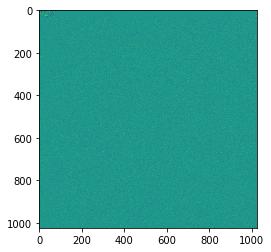

In [140]:
plt.imshow(U)

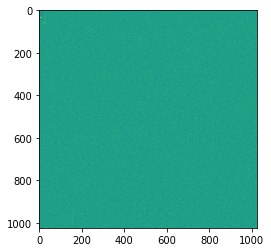

In [141]:
plt.imshow(VT)

TypeError: Invalid dimensions for image data

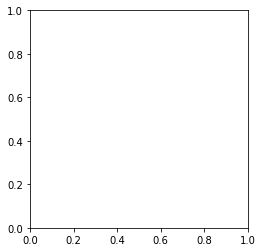

In [142]:
plt.imshow(S)

In [150]:
Xk = U @ S @ U.T

Xk.shape

(1024,)

TypeError: Invalid dimensions for image data

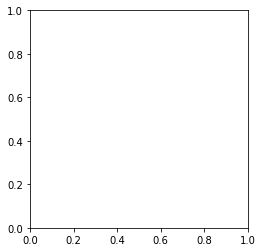

In [149]:
plt.imshow(Xk)